<a href="https://colab.research.google.com/github/gitswathig/assignment3/blob/main/animalclassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()


Saving animal_classification.zip to animal_classification.zip


In [2]:
!unzip animal_classification.zip -d /content/animal_classification


Archive:  animal_classification.zip
   creating: /content/animal_classification/Animal Classification/
   creating: /content/animal_classification/Animal Classification/dataset/
   creating: /content/animal_classification/Animal Classification/dataset/Bear/
  inflating: /content/animal_classification/Animal Classification/dataset/Bear/bear_1.jpg  
  inflating: /content/animal_classification/Animal Classification/dataset/Bear/Bear_10.jpg  
  inflating: /content/animal_classification/Animal Classification/dataset/Bear/Bear_10_1.jpg  
  inflating: /content/animal_classification/Animal Classification/dataset/Bear/Bear_10_2.jpg  
  inflating: /content/animal_classification/Animal Classification/dataset/Bear/Bear_10_3.jpg  
  inflating: /content/animal_classification/Animal Classification/dataset/Bear/Bear_11.jpeg  
  inflating: /content/animal_classification/Animal Classification/dataset/Bear/Bear_11_1.jpg  
  inflating: /content/animal_classification/Animal Classification/dataset/Bear/Bear

In [3]:
import os
os.listdir("/content/animal_classification")


['Animal Classification']

In [4]:
import os
os.listdir("/content/animal_classification/Animal Classification")


['dataset', 'Image Classification of animals.pdf']

In [5]:
import os
dataset_path = "/content/animal_classification/Animal Classification/dataset"
os.listdir(dataset_path)


['Bear',
 'Horse',
 'Dolphin',
 'Cat',
 'Panda',
 'Elephant',
 'Kangaroo',
 'Zebra',
 'Dog',
 'Lion',
 'Giraffe',
 'Cow',
 'Bird',
 'Tiger',
 'Deer']

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Path to your dataset folder
dataset_path = "/content/animal_classification/Animal Classification/dataset"

# Create ImageDataGenerator with rescaling and validation split
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # 20% of images used for validation
)

# Training data
train_gen = datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

# Validation data
val_gen = datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 1561 images belonging to 15 classes.
Found 383 images belonging to 15 classes.


In [7]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout, Input
from tensorflow.keras.optimizers import Adam

# Load VGG16 without the top classification layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224,224,3))

# Freeze base layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification head
x = base_model.output
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(15, activation='softmax')(x)  # 15 classes

model = Model(inputs=base_model.input, outputs=output)


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [8]:
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    12,845,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 15)             │         7,695 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,567,951 (105.16 MB)

 Trainable params: 12,853,263 (49.03 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [9]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ModelCheckpoint('best_animal_model.h5', monitor='val_loss', save_best_only=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)
]


In [14]:
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10,
    steps_per_epoch=10,
    validation_steps=5,
)


Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 294s 31s/step - accuracy: 0.6474 - loss: 1.2526 - val_accuracy: 0.5312 - val_loss: 1.5971
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 322s 34s/step - accuracy: 0.7008 - loss: 1.0360 - val_accuracy: 0.5437 - val_loss: 1.4820
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 295s 30s/step - accuracy: 0.7326 - loss: 0.9935 - val_accuracy: 0.6000 - val_loss: 1.3068
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 324s 34s/step - accuracy: 0.8085 - loss: 0.8348 - val_accuracy: 0.5312 - val_loss: 1.4269
Epoch 5/10
 9/10 ━━━━━━━━━━━━━━━━━━━━ 19s 20s/step - accuracy: 0.7634 - loss: 0.8135

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


10/10 ━━━━━━━━━━━━━━━━━━━━ 275s 28s/step - accuracy: 0.7628 - loss: 0.8173 - val_accuracy: 0.5750 - val_loss: 1.3993
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 321s 32s/step - accuracy: 0.7355 - loss: 0.8903 - val_accuracy: 0.6062 - val_loss: 1.3698
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 322s 34s/step - accuracy: 0.7493 - loss: 0.8985 - val_accuracy: 0.6000 - val_loss: 1.2252
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 323s 34s/step - accuracy: 0.7798 - loss: 0.8474 - val_accuracy: 0.5938 - val_loss: 1.3337
Epoch 9/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 294s 31s/step - accuracy: 0.7686 - loss: 0.8735 - val_accuracy: 0.6500 - val_loss: 1.1987
Epoch 10/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 275s 28s/step - accuracy: 0.7758 - loss: 0.8173 - val_accuracy: 0.6062 - val_loss: 1.2521


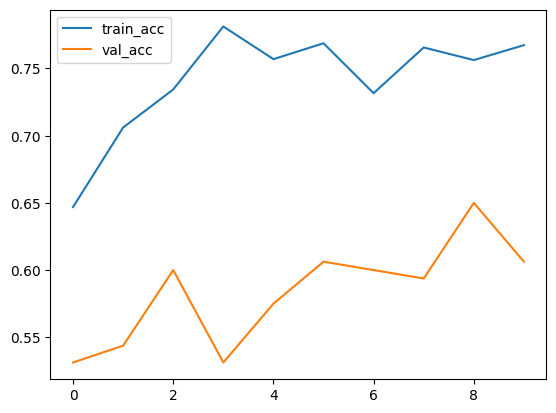

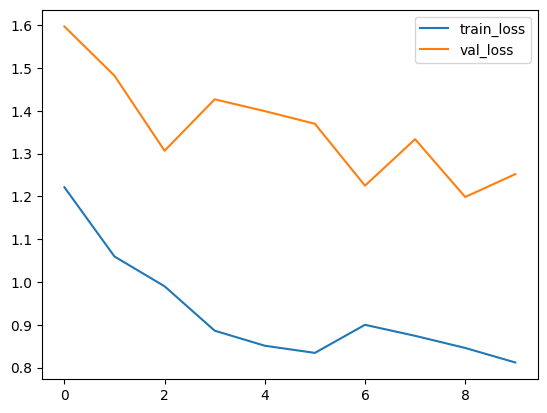

In [15]:
# Accuracy and loss plots
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()
